In [110]:
import pandas                            as pd
import numpy                             as np

from   sklearn    import datasets        as ds
from   sklearn    import model_selection as ms
from   sklearn    import tree            as tr
from   sklearn    import metrics         as mt
from   matplotlib import pyplot          as plt

In [111]:
#Gerando dados sinteticos
#Generating Synthetic Data

n_samples = 20000
n_features = 2
n_informative = 2
n_redundant= 0
random_state = 42

#dataset
X,y = ds.make_classification(n_samples = n_samples,
                    n_features= n_features,
                    n_informative= n_informative,
                    n_redundant= n_redundant,
                    random_state=random_state
                    )

# production dataset
X, X_prod,y, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [112]:
X.shape

(16000, 2)

In [113]:
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X,y)


yhat = model.predict(X)
acc = mt.accuracy_score(y, yhat)
print('Accuracy of model on train data is {}'.format(acc))

yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on train data is 1.0
Accuracy of model on new data is 0.88225


## Estrategy Train - Test

&emsp;Existe uma estratégia para medir a capacidade de generalização de um algoritmo de Machine Learning do que colocá-lo diretamente em Produção.
&emsp;Essa estratégia consiste em separar um conjunto de dados em 2 subconjuntos:Treinamento e Teste.
A separação dos dados em conjunto de treinamento e teste deve ser feita de
maneira aleatória, mantendo a proporção original dos exemplos entre as
classes. Por exemplo:
1. Conjunto de dados original ( 100% dos dados )
a. 25 colunas e 10.000 linhas
b. 60% classe A e 40% classe B
2. Conjunto de dados de treino ( 70% dos dados originais )
a. 25 colunas e 7.000 linhas
b. 60% classe A e 40% classe B
3. Conjunto de dados de validação ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B
4. Conjunto de dados de teste ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B


&emsp;There is a strategy for measuring the generalization ability of a Machine Learning algorithm other than putting it directly into production.
This strategy involves dividing a dataset into two subsets: Training and Testing.
The separation of the data into training and test sets should be done randomly, maintaining the original proportion of examples among the classes. For example:

1. Original dataset (100% of the data)
a. 25 columns and 10,000 rows
b. 60% class A and 40% class B
2. Training dataset (70% of the original data)
a. 25 columns and 7,000 rows
b. 60% class A and 40% class B
3. Validation dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B
4. Test dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B

In [120]:
#Separando treino e teste
X_train,x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2,random_state=random_state)

In [126]:
#Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train,y_train)

#classificação sobre os dados de teste
yhat_test = model.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)
print(f"Acuracy over test: {acc_test:.2f}")

Acuracy over test: 0.88


In [129]:
#tuning
values = [i for i in range(1,60)]
test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    
    # classificação sobre o teste
    yhat_test = model.predict(x_test)
    acc_test = mt.accuracy_score(y_test,yhat_test)
    test_score.append(acc_test)

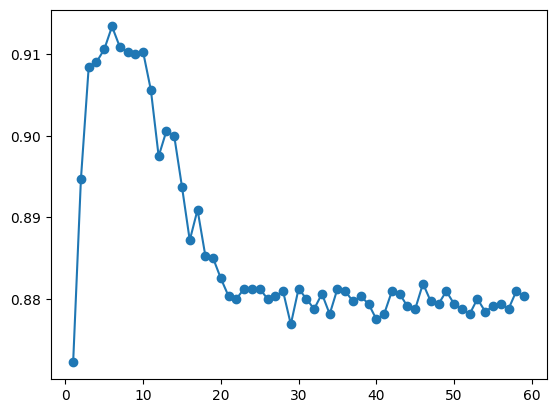

In [130]:
plt.plot(values, test_score, '-o', label = 'test');

In [137]:
# trained model
model_last = tr.DecisionTreeClassifier(max_depth=6)
model_last.fit(np.concatenate((X_train,x_test)), 
               np.concatenate((y_train,y_test)))
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on test data is 0.8803125
Accuracy of model on new data is 0.91275


## Train - Test - Validation

A separação dos dados em conjunto de treinamento, teste e validação deve ser feita de
maneira aleatória, mantendo a proporção original dos exemplos entre as
classes. Por exemplo:
1. Conjunto de dados original ( 100% dos dados )
a. 25 colunas e 10.000 linhas
b. 60% classe A e 40% classe B
2. Conjunto de dados de treino ( 70% dos dados originais )
a. 25 colunas e 7.000 linhas
b. 60% classe A e 40% classe B
3. Conjunto de dados de validação ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B
4. Conjunto de dados de teste ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B


In [138]:
X_train,x_val, y_train, y_val = ms.train_test_split(X_train,y_train, test_size= 0.2)

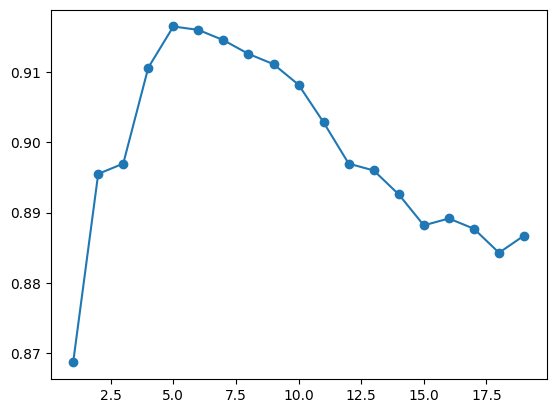

In [147]:
#tuning
values = [i for i in range(1,20)]
val_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    
    yhat_val = model.predict(x_val)
    acc_val = mt.accuracy_score(y_val,yhat_val)
    val_score.append(acc_val)
plt.plot(values, val_score, '-o', label = 'Val');

In [153]:
model = tr.DecisionTreeClassifier( max_depth = 5 )
model.fit(X_train, y_train)
yhat_val = model.predict(x_val)
acc_val = mt.accuracy_score(y_val,yhat_val)
print(f"Accuracy over vailation {acc_val}")

Accuracy over vailation 0.91650390625


In [151]:
#model trained with train + validate
model_last = tr.DecisionTreeClassifier(max_depth=5)
model_last.fit(np.concatenate((X_train,x_val)),
               np.concatenate((y_train,y_val)))
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)
acc_test

0.9103125

In [152]:
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
acc_prod

0.911

In [154]:
print('Accuracy of model on validations data is {}'.format(acc_val))
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on validations data is 0.91650390625
Accuracy of model on test data is 0.9103125
Accuracy of model on new data is 0.911
